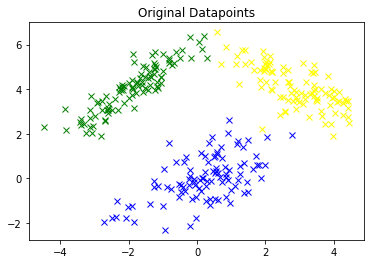

0.3233333333333333


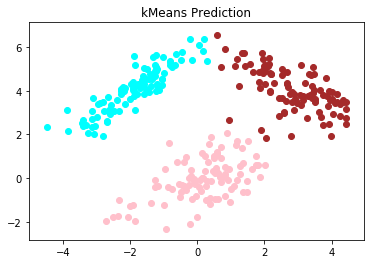

In [322]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
import math
import random

xdat=[]*300
ydat=[]*300
data1=[]*300
data2=[]*300
data3=[]*300

# iris=datasets.load_iris()
# print(iris)

# create & plot points:
mean1 = (0, 0)
cov1 = [[1, 0.5], [0.5, 1]]
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
plt.plot(x1, y1, 'x', color="blue")

mean2 = (3, 4)
cov2 = [[1, -0.7], [-0.7, 1]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, 100).T
plt.plot(x2, y2, 'x', color="yellow")

mean3 = (-2, 4)
cov3 = [[1, 0.9], [0.9, 1]]
x3, y3 = np.random.multivariate_normal(mean3, cov3, 100).T
plt.plot(x3, y3, 'x', color="green")
plt.title("Original Datapoints")
plt.savefig('Original_input_data.png', bbox_inches='tight')
plt.show()
# print(y1)

for i,j in zip(x1,y1):
    data1.append([i,j,0])
for i,j in zip(x2,y2):
    data2.append([i,j,1])
for i,j in zip(x3,y3):
    data3.append([i,j,2])
data = np.concatenate([data1,data2,data3], axis=(0))    
# x_train, x_test, y_train, y_test = train_test_split(data[:,0:2],data[:,2], test_size=0.0)
x=data[:,0:2]
labels=data[:,2]
# print(data)
# print(y_test)
   
# kMeans Clustering
modelKM = KMeans(n_clusters=3)
modelKM.fit_predict(x)
print(accuracy_score(labels, modelKM.predict(x)))

# estimator=KMeans()
# estimator.fit(data[:,0:2])
# res=estimator.__dict__
# print('Centroids:',res['cluster_centers_'])
# print(modelKM.labels_)
for i in range(len(modelKM.labels_)):
    if(modelKM.labels_[i]==0):
        plt.scatter(data[i,0],data[i,1], color='pink')
    elif(modelKM.labels_[i]==1):
        plt.scatter(data[i,0],data[i,1], color='cyan')
    else:
        plt.scatter(data[i,0],data[i,1], color='brown')
# plt.scatter(res['cluster_centers_',:])
plt.title('kMeans Prediction')
plt.savefig('kmeans.png', bbox_inches='tight')
plt.show()


0.6366666666666667
cov: [[[4.72434659 0.68637797]
  [0.68637797 4.80139593]]

 [[4.72643531 0.55367218]
  [0.55367218 4.63781019]]

 [[4.73729589 0.53611087]
  [0.53611087 4.63903569]]]
means: [[0.41402559 2.64818668]
 [0.3915562  2.79820749]
 [0.38119916 2.75373785]]
prob: [0.34002841 0.31359342 0.34637816]


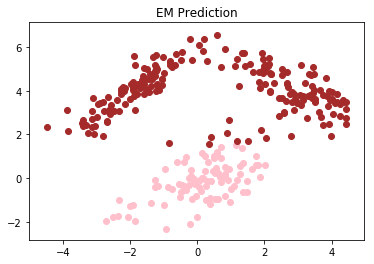

In [323]:
# EM Clustering
modelEM =GaussianMixture(n_components=3, init_params='random')
modelEM.fit(x)
modelEM.predict(x)
print(accuracy_score(labels, modelEM.predict(x)))
print("cov:",modelEM.covariances_)
print("means:",modelEM.means_)
print("prob:",modelEM.weights_)

for i,pred in enumerate(modelEM.predict(x)):
    if(pred==0):
        plt.scatter(data[i,0],data[i,1], color='pink')
    elif(pred==1):
        plt.scatter(data[i,0],data[i,1], color='cyan')
    else:
        plt.scatter(data[i,0],data[i,1], color='brown')

plt.title('EM Prediction')
plt.savefig('EM.png', bbox_inches='tight')
plt.show()